 ## Definição do Problema
    
    A empresa ZuZa Inc coletou dados do ano anterior com diversos atributos de funcionários de todos os setores. O objetivo é estudar a relação desses atributos e o impacto na promoção dos funcionários. Esse trabalho de análise pode ser usado mais tarde para construir modelos de Machine Learning para prever se um colaborador será ou não promovido.\n",
    
    Essas são as perguntas que devem ser respondidas:
    
    Pergunta 1 - Qual a Correlação Entre os Atributos dos Funcionários
    Pergunta 2 - Qual o Tempo de Serviço da Maioria dos Funcionários?
    Pergunta 3 - Qual a Distribuição das Idades dos Funcionários?
    Pergunta 4 - Qual Avaliação do Ano Anterior Foi Mais Comum?
    Pergunta 5 - Qual o Número de Treinamentos Mais Frequente?
    Pergunta 6 - Qual a Proporção dos Funcionários Por Canal de Recrutamento?\
    Pergunta 7 - Qual a Relação Entre a Promoção e a Avaliação do Ano Anterior?
    
    Seu trabalho é limpar e preparar os dados e então construir um dashboard no Power BI para apresentar seus resultados.
   

## Iniciando a Análise Explorátoria

In [ ]:
#Verificar  a versão do python
from platform import python_version
print("Versão do Python:", python_version())

In [ ]:
#Pacote para criar versionamento das versões do Python
!pip install -q -U watermark

In [ ]:
#Imports
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Versões dos pacotes usados neste projeto
%reload_ext watermark
%watermark -a "Inside Tech" --iversions

## Carregar Dados

In [ ]:
dadosRH = pd.read_csv('dadosRH.csv')

In [ ]:
dadosRH.head()

In [ ]:
dadosRH.shape

## Limpeza e Transformação de Dados

In [ ]:
dadosRH.isnull().sum()

In [ ]:
dadosRH.groupby(['educacao']).count()
#Este agrupamento está menor que o total

In [ ]:
sns.countplot(dadosRH['educacao'])

In [ ]:
dadosRH.groupby(['aval_ano_anterior']).count()

In [ ]:
sns.countplot(dadosRH['aval_ano_anterior']).count()
#O total deste agrupamento é diferente no numero todat de linhas

## Aplicação e preencher os valores ausentes

In [ ]:
dadosRH['educacao'].fillna(dadosRH['educacao'].mode()[0], inplace=True)

In [ ]:
dadosRH['aval_ano_anterior'].fillna(dadosRH['aval_ano_anterior'].median(), inplace=True)

In [ ]:
dadosRH.isnull().sum()

In [ ]:
dadosRH.groupby(['educacao']).count()

In [ ]:
dadosRH.groupby(['aval_ano_anterior']).count()

##  Verificar o balanceamento na variável promovido

In [13]:
dadosRH.groupby(['promovido']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico
promovido,,,,,,,,,,
0,50140,50140,50140,47853,50140,50140,50140,50140,46355,50140
1,4668,4668,4668,4546,4668,4668,4668,4668,4329,4668


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promovido', ylabel='count'>

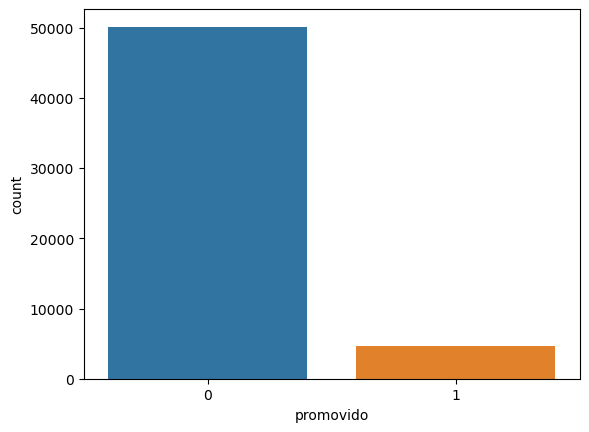

In [14]:
sns.countplot(dadosRH['promovido'])
#O gráfico mostra o desbalanceamento das variáveis promovidos ou não

In [15]:
df_classe_majoritaria = dadosRH[dadosRH.promovido==0]
df_classe_minoritaria = dadosRH[dadosRH.promovido==1]

In [16]:
df_classe_majoritaria.shape

(50140, 11)

In [17]:
df_classe_minoritaria.shape

(4668, 11)

In [18]:
#Balancear a Classe usando o Upsample
from sklearn.utils import resample
df_classe_majoritaria_upsampled = resample(df_classe_minoritaria,
                                          replace=True,
                                          n_samples=50140,
                                          random_state=150)


In [19]:
dadosRH_balanceados = pd.concat([df_classe_majoritaria, df_classe_majoritaria_upsampled])

In [20]:
dadosRH_balanceados.promovido.value_counts()

0    50140
1    50140
Name: promovido, dtype: int64

In [21]:
dadosRH_balanceados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 0 to 5869
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_funcionario       100280 non-null  int64  
 1   departmento          100280 non-null  object 
 2   regiao               100280 non-null  object 
 3   educacao             96638 non-null   object 
 4   genero               100280 non-null  object 
 5   canal_recrutamento   100280 non-null  object 
 6   numero_treinamentos  100280 non-null  int64  
 7   idade                100280 non-null  int64  
 8   aval_ano_anterior    92799 non-null   float64
 9   tempo_servico        100280 non-null  int64  
 10  promovido            100280 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 9.2+ MB


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promovido', ylabel='count'>

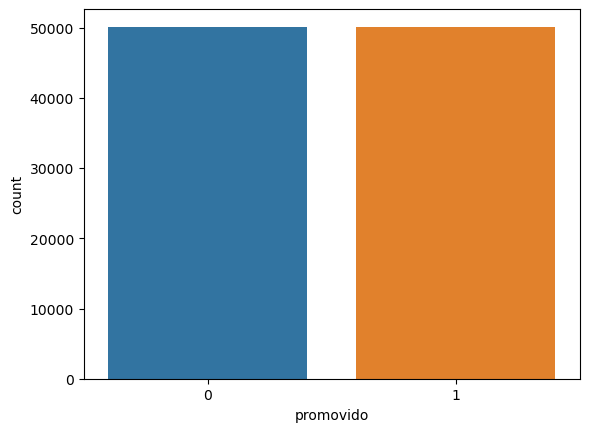

In [22]:
sns.countplot(dadosRH_balanceados['promovido'])

## Salvar o DataSet de Dados Balanceados

In [23]:
dadosRH_balanceados.to_csv('dadosRH_modificado.csv', encoding='utf-8', index=False)

A partir de agora vamos usar o Power Bi para responder as perguntas

In [24]:
dataset = pd.read_csv('dadosRH_modificado.csv')
dataset.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [25]:
dataset.shape

(100280, 11)

## Pergunta 1 - Qual a Correlação entre os atributos dos funcionários?

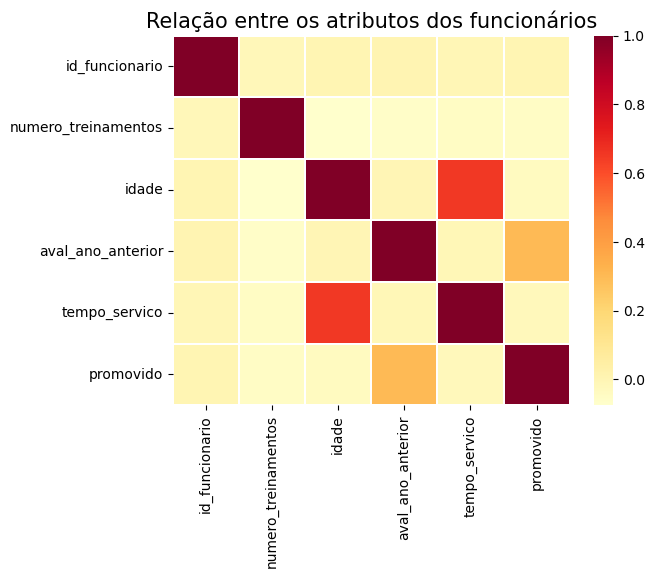

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = dataset.corr()
sns.heatmap(corr, cmap="YlOrRd", linewidths=0.1)
plt.title('Relação entre os atributos dos funcionários', fontsize=15)
plt.show()

## Pergunta 2 - Qual o Tempo de Serviço da Maioria dos Funcionários?

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


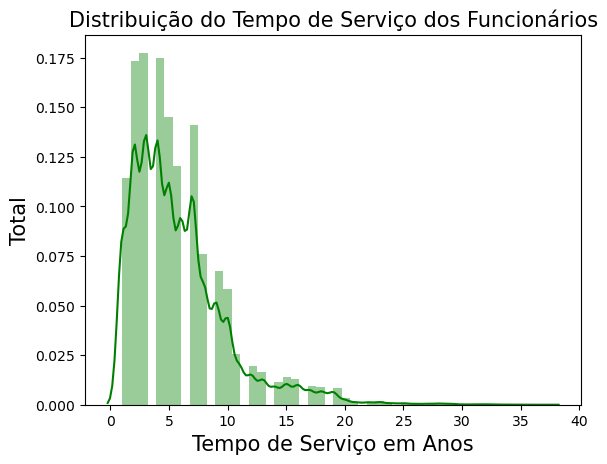

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['tempo_servico'], color='green')
plt.title('Distribuição do Tempo de Serviço dos Funcionários', fontsize=15)
plt.xlabel('Tempo de Serviço em Anos', fontsize = 15)
plt.ylabel('Total', fontsize = 15)
plt.show()

## Pergunta 3 - Qual a distribuição das Idades dos Funcionários?

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


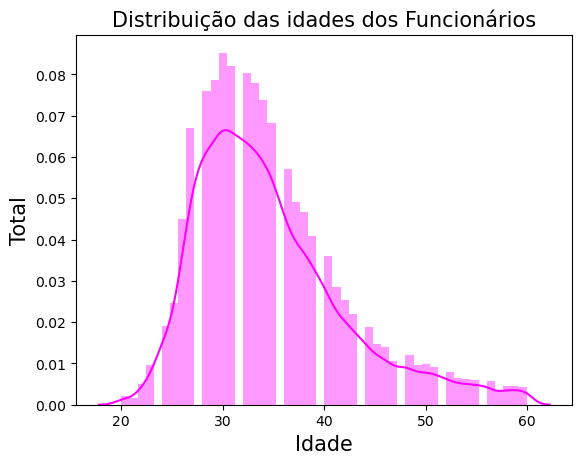

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['idade'], color='magenta')
plt.title('Distribuição das idades dos Funcionários', fontsize=15)
plt.xlabel('Idade', fontsize = 15)
plt.ylabel('Total', fontsize = 15)
plt.show()

## Pergunta 4 - Qual Avaliação do Ano Anterior Foi Mais Comum

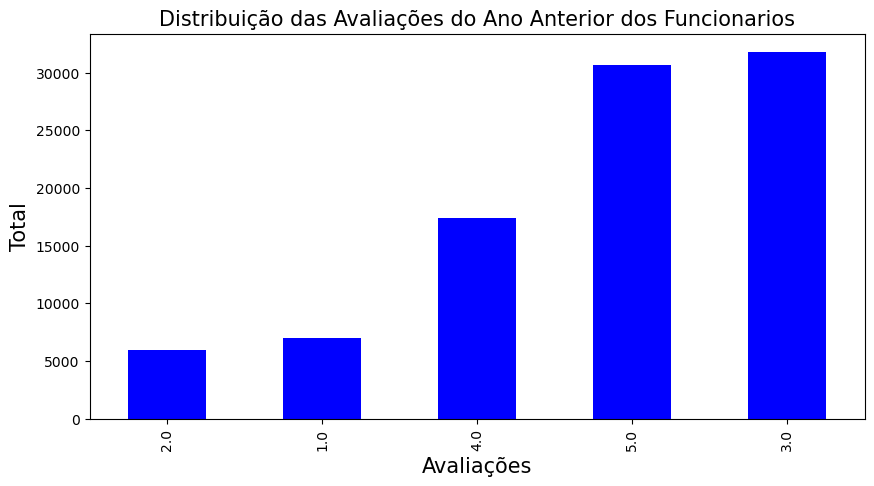

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset['aval_ano_anterior'].value_counts().sort_values().plot.bar(color='blue', figsize = (10,5))
plt.title('Distribuição das Avaliações do Ano Anterior dos Funcionarios', fontsize=15)
plt.xlabel('Avaliações', fontsize = 15)
plt.ylabel('Total', fontsize = 15)
plt.show()                                                                    

## Pergunta 5 - Qual é o número de Treinamentos Mais Frequente?

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


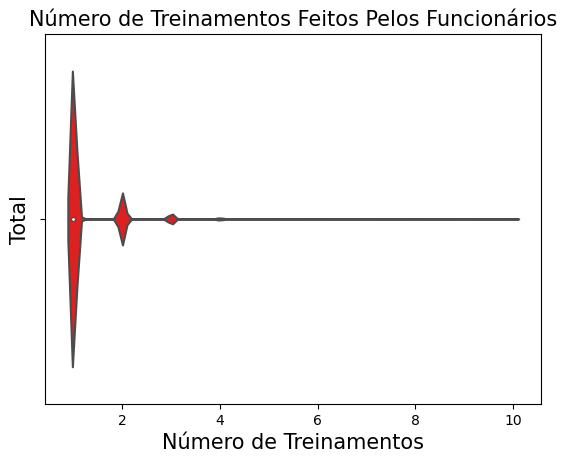

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(dataset['numero_treinamentos'], color= 'red')
plt.title('Número de Treinamentos Feitos Pelos Funcionários', fontsize=15)
plt.xlabel('Número de Treinamentos', fontsize = 15)
plt.ylabel('Total', fontsize = 15)
plt.show()

## 6 - Qual a proporção dos Funcionario por canal de recrutamento?

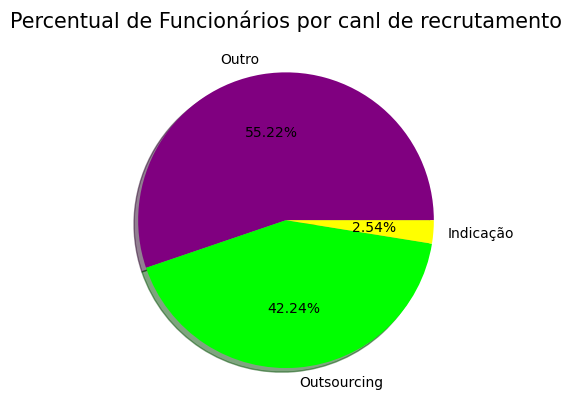

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset['canal_recrutamento'].value_counts()
fatias = [55375, 42358, 2547]
labels = "Outro","Outsourcing","Indicação"
colors = ['purple','lime','yellow']
explode = [0,0,0]
plt.pie(fatias, labels=labels, colors=colors, explode=explode, shadow=True, autopct="%.2f%%")
plt.title('Percentual de Funcionários por canal de recrutamento', fontsize = 15)
plt.axis('off')
#plt.legend()
plt.show()

## Qual a Relação entre a promoção e a Avaliação do Ano Anterior?

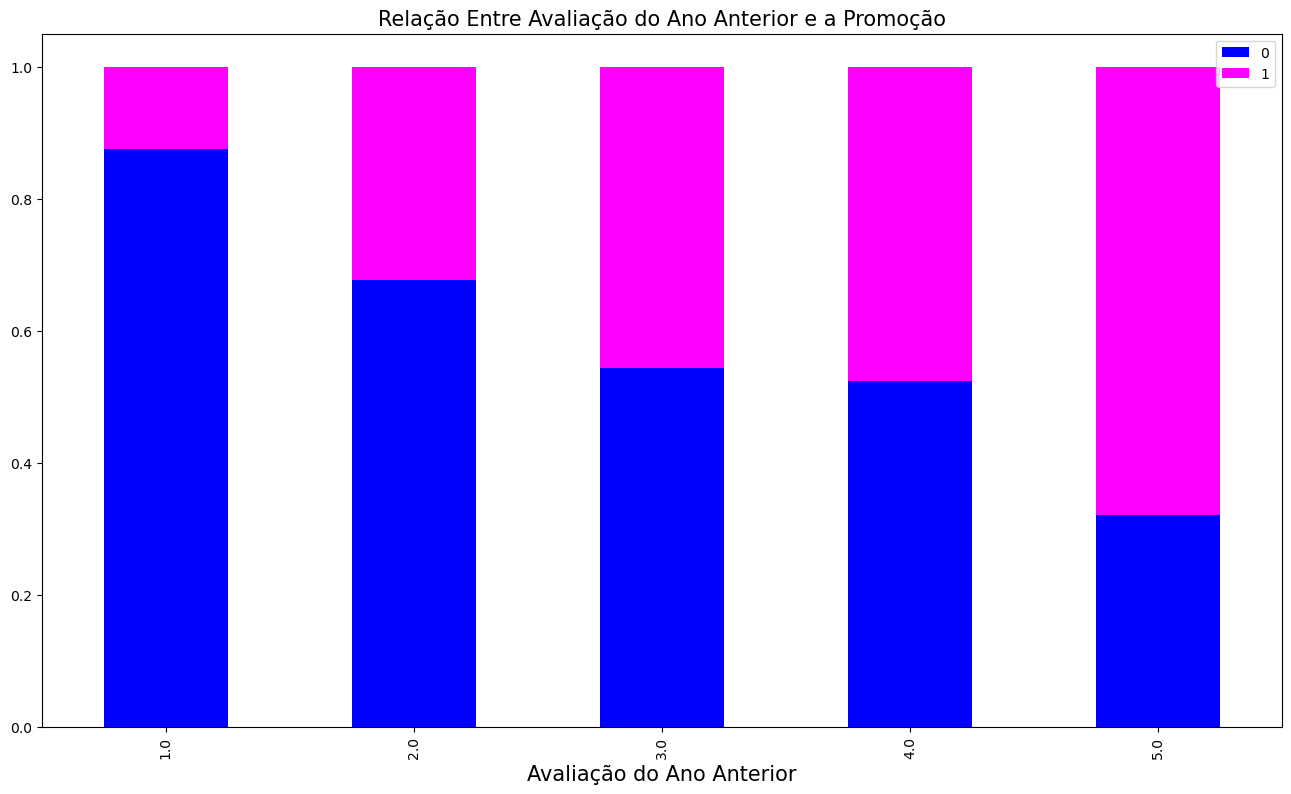

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.crosstab(dataset['aval_ano_anterior'], dataset['promovido'])
data.div(data.sum(1).astype(float), axis=0).plot(kind = 'bar',
                                                 stacked=True,
                                                 figsize=(16,9),
                                                 color = ['blue','magenta'])
plt.title('Relação Entre Avaliação do Ano Anterior e a Promoção', fontsize=15)
plt.xlabel('Avaliação do Ano Anterior', fontsize=15)
plt.legend()
plt.show()

## FIM